In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf


from tensorflow.python.keras import backend as k

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import cv2 as cv

import seaborn as sns

In [2]:
PATH = os.path.join('E:\sample')

In [3]:
train_dir = os.path.join(PATH, 'Special_Train_One')
validation_dir = os.path.join(PATH, 'Special_Test_One')

In [4]:
Train_Set="E:\sample\Special_Train_One"
Val_Set="E:\sample\Special_Test_One"

#Categroized images
#4 types of subCategories

CATEGORIES=["Single","Others"]

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [6]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 48
IMG_WIDTH = 48

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 21234 images belonging to 2 classes.


In [8]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 3692 images belonging to 2 classes.


In [9]:
Train_Data=[]
import cv2 as cv
for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Train_Set,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            Train_Data.append([img,label])

In [10]:
Test_Data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Val_Set,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            
            Test_Data.append([img,label])

In [11]:
print(len(Train_Data))
print(len(Test_Data))

21234
3692


In [12]:
import random

random.shuffle(Train_Data)


In [13]:
for lbl in Train_Data[:10]:
    print(lbl[1])

1
1
0
0
0
1
1
1
0
1


In [14]:
train_X=[]
train_y=[]

for features,label in Train_Data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(21234, 21234)

In [15]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in Test_Data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(3692, 3692)

In [16]:

train_X=np.array(train_X).reshape(-1,48,48,3)
train_X=train_X/255.0
train_X.shape

(21234, 48, 48, 3)

In [17]:
test_X=np.array(test_X).reshape(-1,48,48,3)
test_X=test_X/255.0
test_X.shape

(3692, 48, 48, 3)

In [18]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

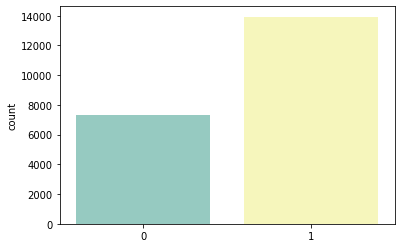

In [19]:
sns.countplot(train_y,palette='Set3')

In [20]:
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [21]:
one_hot_test=to_categorical(test_y)
one_hot_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from keras.applications import vgg16
from keras.preprocessing import image

In [23]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (48, 48, 3)))

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (48, 48, 3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = (48, 48, 3)))
#model.add(Conv2D(50, (3,3), activation = 'relu', input_shape = (48, 48, 3)))
model.add(MaxPool2D(pool_size = (2,2)))


#model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (48, 48, 3)))
#model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(256, (3,3), activation = 'relu', input_shape = (48, 48, 3)))
model.add(Dropout(0.5))
model.add(Flatten())

#model.add(Dense(256, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         295168    
__________

In [25]:
hist=model.fit(train_X,one_hot_train,epochs=30,batch_size=32,validation_split=0.2,validation_data=(test_X,one_hot_test))




Train on 21234 samples, validate on 3692 samples
Epoch 1/30





21234/21234 [==============================] - 68s 3ms/step - loss: 0.3753 - acc: 0.8317 - val_loss: 0.2078 - val_acc: 0.9136
Epoch 2/30
21234/21234 [==============================] - 19s 898us/step - loss: 0.1694 - acc: 0.9355 - val_loss: 0.1208 - val_acc: 0.9607
Epoch 3/30
21234/21234 [==============================] - 19s 894us/step - loss: 0.1331 - acc: 0.9495 - val_loss: 0.1146 - val_acc: 0.9577
Epoch 4/30
21234/21234 [==============================] - 19s 898us/step - loss: 0.1206 - acc: 0.9548 - val_loss: 0.1186 - val_acc: 0.9561
Epoch 5/30
21234/21234 [==============================] - 19s 895us/step - loss: 0.1127 - acc: 0.9577 - val_loss: 0.1093 - val_acc: 0.9626
Epoch 6/30
21234/21234 [==============================] - 19s 895us/step - loss: 0.1085 - acc: 0.9610 - val_loss: 0.1051 - val_acc: 0.9613
Epoch 7/30
21234/21234 [==============================] - 19s 895us/step - loss: 0.1001 - acc: 0.9629 - val_los

In [26]:
model.save('One_16_17.h5')

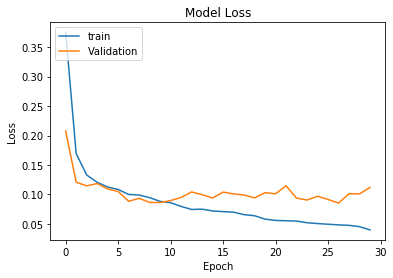

In [27]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

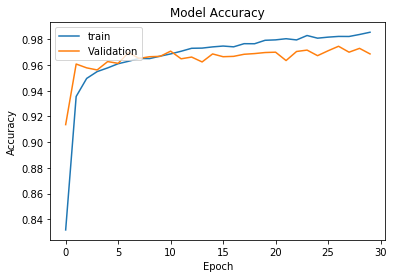

In [28]:
#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [29]:
y_pred=model.predict_classes(test_X)

In [30]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)


0.9685807150595883

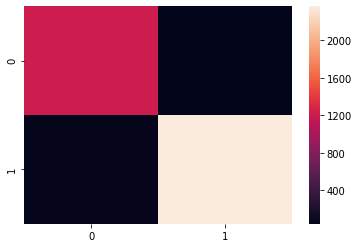

In [31]:
sns.heatmap(confusion_matrix(test_y,y_pred))

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      cm = cm * 100
      print("\nNormalized confusion matrix")
  else:
      print('\nConfusion matrix, without normalization')
  print(cm)
  print ()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.0f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


In [33]:

y_pred=model.predict_classes(test_X)
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

In [34]:
import itertools


Confusion matrix, without normalization
[[1214   45]
 [  71 2362]]



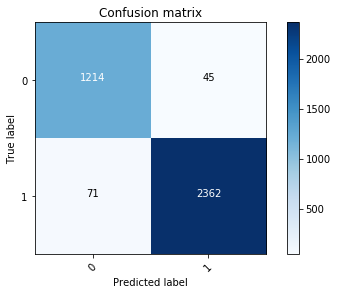

In [35]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1])


Normalized confusion matrix
[[96.43  3.57]
 [ 2.92 97.08]]



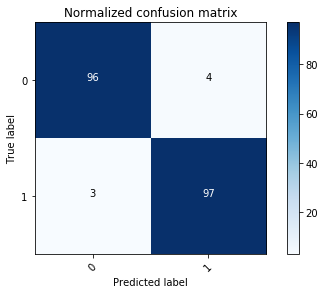

In [36]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')         # -----------------to excel for comparision 